# New York Yellow Taxi Data Analysis

#### Introduction

I am pleased to present my solution for the data analysis assignment focused on analyzing the Yellow Taxi Trip Records dataset provided by the Taxi and Limousine Commission (TLC) of New York City. This assignment aimed to extract valuable insights and trends from the dataset, enabling a comprehensive understanding of the Yellow Taxi data.

#### Objective

The objective of this assignment was to analyze the provided dataset and uncover meaningful insights and trends related to Yellow Taxi trips. Throughout the analysis, I focused on exploring various aspects of the data, including pick-up and drop-off locations, trip duration, fares, and other relevant information. The primary goal was to extract valuable insights that can inform decision-making and potentially drive improvements in the taxi service.

#### Dataset

The dataset for this assignment was obtained from the GitHub repository GitHub - m-gauer/NYC_TLC_Yellow_Taxi_Data. It consisted of a sample from the Yellow Taxi Trip Records Data Set provided by the TLC of NYC. The dataset contained a range of attributes that were crucial for the analysis, and the data dictionary provided valuable information about the meaning and structure of each attribute.

#### Approach

In approaching this assignment, I adopted a data-driven methodology that involved several key steps. These steps included data cleaning, feature engineering, and extensive visualization to gain a comprehensive understanding of the dataset. By leveraging these techniques, I aimed to extract valuable insights from the Yellow Taxi data and present them in a clear and visually appealing manner.

#### Data Cleaning and Feature Engineering Steps


1. Rows containing negative values for total amount, fare amount, tip amount, MTA tax, tolls amount, duration, and speed, which are not possible, have been removed.
2. Trip distance's max value is 177247 miles. To get rid of such excessively long trip distance values, I sorted trip distances of the trips and then set a cutoff value and removed trips above this value.
3. Dropped rows where trip distance is below 0.05 miles in order to analyze real trips.
4. Dropped rows where speed mph is greater than 70 mph since the speed limit in NYC is max of 65 mph
5. There are some trips whose trip duration are greater than 80000 seconds, which is impossible Since both taxi and FHV drivers are prohibited from transporting passengers for more than 10 hours in any 24-hour period(Monday-Sunday), I will drop rows with more than 40000 seconds.
6. Calculated trip duration using pick up and drop off date and times, calculated speed using the trip distance and duration and calculated day of the week that the trip has been made. 


#### Key Insights

1. Most of the trips are made in Friday and Sunday is the least busy day
2. Most of the trips are made around 6pm, most likely after work. Approximately 20% of all trips are between 5pm and 7pm.
3. After beginning of the 2020, total number of trips decreased sharply.And it reaches lowest point at 2020 summer season, It is probably caused from the pandemic. After the lowest month, the number of trips starts to increase, but still number of trips is lower than before pandemic.
4. 73% of all trips are made with 1 passenger and 14% of them with 2 passengers.
5. 72% of all trips are paid with credit cards.
6. Average taxi trip distance is around 3 miles, but there some long trip distances as well.
7. Trip durations are mostly distributed between 15-20 min, but there some long trip durations as well.
8. Average total amount per trip is around 20$
9. The most common pick-up and drop-off borough is Manhattan.
10. 5% of all trips are started from Airports and 2% of trips are finished at Airports.
11. JFK Airport ranks first with 57% of all trips originating from airports. Among trips completed with airport drop-offs, the most frequently visited airport is LaGuardia Airport, accounting for 49%.
12. People prefer to share taxi when they need to pay more
13. People prefer to share taxi when they need to make a long trip
14. While the average trip distance is 3 miles, the trip distance is highest early in the morning (4am-6am) and is two times higher than the average. This increase is most probably due to airport trips.
15. The highest value of the average trip distance is on Sunday. This may be due to people's preference for visiting places located at longer distances. However, on weekdays, most of the trips are likely related to work.
16. After 2020 number of credit card payments start to increase while the cash payments decrease. It may be caused change in the payment habit due to pandemic.
17. Average total amount is the highest in card payments.
18. Passengers give tips on 71% of all trips.
19. People tend to give tip in the late night hours and weekdays
20. We observe that as the trip distance increases, the fare amount also increases.
21. The most frequently traveled borough, where 84% of all trips take place, is Manhattan. Additionally, within Manhattan, it is observed that the highest number of trips occurs between Upper East Side South and Upper East Side North.
22. The fare amount per mile increases over the years, especially in 2023 it is very high compared to other years. We can interpret this as an inflation effect.

In [72]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import PercentFormatter

In [73]:
#Read Yellow Taxi Dataset
yellow_taxi_df=pd.read_csv("Yellow_Taxi_Assignment.csv")
yellow_taxi_df

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
0,2,2018-01-01 12:02:01,2018-01-01 12:04:05,1.0,0.53,1.0,N,142,163,1,3.5,0.0,0.5,1.29,0.0,0.3,5.59,NaN,NaN
1,2,2018-01-01 12:26:48,2018-01-01 12:31:29,1.0,1.05,1.0,N,140,236,1,6.0,0.0,0.5,1.02,0.0,0.3,7.82,NaN,NaN
2,2,2018-01-01 01:28:34,2018-01-01 01:39:38,4.0,1.83,1.0,N,211,158,1,9.5,0.5,0.5,1.62,0.0,0.3,12.42,NaN,NaN
3,1,2018-01-01 08:51:59,2018-01-01 09:01:45,1.0,2.30,1.0,N,249,4,2,10.0,0.0,0.5,0.00,0.0,0.3,10.80,NaN,NaN
4,2,2018-01-01 01:00:19,2018-01-01 01:14:16,1.0,3.06,1.0,N,186,142,1,12.5,0.5,0.5,1.00,0.0,0.3,14.80,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
304973,1,2023-01-31 00:11:27,2023-01-31 00:38:56,1.0,9.90,99.0,N,48,47,1,35.5,0.0,0.5,0.00,0.0,1.0,37.00,0.0,0.0
304974,2,2023-01-31 16:06:08,2023-01-31 16:52:18,1.0,8.27,1.0,N,87,75,2,44.3,2.5,0.5,0.00,0.0,1.0,50.80,2.5,0.0
304975,2,2023-01-31 15:31:38,2023-01-31 15:44:48,1.0,0.71,1.0,N,236,236,2,12.1,0.0,0.5,0.00,0.0,1.0,16.10,2.5,0.0
304976,1,2023-01-31 20:35:17,2023-01-31 20:42:56,1.0,1.80,1.0,N,141,170,2,10.7,3.5,0.5,0.00,0.0,1.0,15.70,2.5,0.0


In [74]:
#I downloaded Taxi Zone Lookup Table using the link in data dictionary. I will use this location info in the analysis part
#Read Taxi Zone Lookup Data
taxi_zone_lkp_df=pd.read_csv("taxi+_zone_lookup.csv")
taxi_zone_lkp_df

,LocationID,Borough,Zone,service_zone
0,1,EWR,Newark Airport,EWR
1,2,Queens,Jamaica Bay,Boro Zone
2,3,Bronx,Allerton/Pelham Gardens,Boro Zone
3,4,Manhattan,Alphabet City,Yellow Zone
4,5,Staten Island,Arden Heights,Boro Zone
...,...,...,...,...
260,261,Manhattan,World Trade Center,Yellow Zone
261,262,Manhattan,Yorkville East,Yellow Zone
262,263,Manhattan,Yorkville West,Yellow Zone
263,264,Unknown,NV,NaN


In [75]:
#check dtypes
yellow_taxi_df.dtypes

VendorID                   int64
tpep_pickup_datetime      object
tpep_dropoff_datetime     object
passenger_count          float64
trip_distance            float64
RatecodeID               float64
store_and_fwd_flag        object
PULocationID               int64
DOLocationID               int64
payment_type               int64
fare_amount              float64
extra                    float64
mta_tax                  float64
tip_amount               float64
tolls_amount             float64
improvement_surcharge    float64
total_amount             float64
congestion_surcharge     float64
airport_fee              float64
dtype: object

In [76]:
yellow_taxi_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 304978 entries, 0 to 304977
Data columns (total 19 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   VendorID               304978 non-null  int64  
 1   tpep_pickup_datetime   304978 non-null  object 
 2   tpep_dropoff_datetime  304978 non-null  object 
 3   passenger_count        295465 non-null  float64
 4   trip_distance          304978 non-null  float64
 5   RatecodeID             295465 non-null  float64
 6   store_and_fwd_flag     295465 non-null  object 
 7   PULocationID           304978 non-null  int64  
 8   DOLocationID           304978 non-null  int64  
 9   payment_type           304978 non-null  int64  
 10  fare_amount            304978 non-null  float64
 11  extra                  304978 non-null  float64
 12  mta_tax                304978 non-null  float64
 13  tip_amount             304978 non-null  float64
 14  tolls_amount           304978 non-nu

In [77]:
#Get Borough and Zone Info by joining LocationID and PULocationID-DOLocaitonId
yt_merged1 = pd.merge(yellow_taxi_df, taxi_zone_lkp_df[['LocationID','Borough','Zone']], left_on='PULocationID', right_on='LocationID', how='left')
yt_merged2 = pd.merge(yellow_taxi_df, taxi_zone_lkp_df[['LocationID','Borough','Zone']], left_on='DOLocationID', right_on='LocationID', how='left')
yellow_taxi_df['PULocation_borough'] = yt_merged1['Borough']
yellow_taxi_df['DOLocation_borough'] = yt_merged2['Borough']
yellow_taxi_df['PULocation_zone'] = yt_merged1['Zone']
yellow_taxi_df['DOLocation_zone'] = yt_merged2['Zone']
yellow_taxi_df

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,...,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee,PULocation_borough,DOLocation_borough,PULocation_zone,DOLocation_zone
0,2,2018-01-01 12:02:01,2018-01-01 12:04:05,1.0,0.53,1.0,N,142,163,1,...,1.29,0.0,0.3,5.59,NaN,NaN,Manhattan,Manhattan,Lincoln Square East,Midtown North
1,2,2018-01-01 12:26:48,2018-01-01 12:31:29,1.0,1.05,1.0,N,140,236,1,...,1.02,0.0,0.3,7.82,NaN,NaN,Manhattan,Manhattan,Lenox Hill East,Upper East Side North
2,2,2018-01-01 01:28:34,2018-01-01 01:39:38,4.0,1.83,1.0,N,211,158,1,...,1.62,0.0,0.3,12.42,NaN,NaN,Manhattan,Manhattan,SoHo,Meatpacking/West Village West
3,1,2018-01-01 08:51:59,2018-01-01 09:01:45,1.0,2.30,1.0,N,249,4,2,...,0.00,0.0,0.3,10.80,NaN,NaN,Manhattan,Manhattan,West Village,Alphabet City
4,2,2018-01-01 01:00:19,2018-01-01 01:14:16,1.0,3.06,1.0,N,186,142,1,...,1.00,0.0,0.3,14.80,NaN,NaN,Manhattan,Manhattan,Penn Station/Madison Sq West,Lincoln Square East
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
304973,1,2023-01-31 00:11:27,2023-01-31 00:38:56,1.0,9.90,99.0,N,48,47,1,...,0.00,0.0,1.0,37.00,0.0,0.0,Manhattan,Bronx,Clinton East,Claremont/Bathgate
304974,2,2023-01-31 16:06:08,2023-01-31 16:52:18,1.0,8.27,1.0,N,87,75,2,...,0.00,0.0,1.0,50.80,2.5,0.0,Manhattan,Manhattan,Financial District North,East Harlem South
304975,2,2023-01-31 15:31:38,2023-01-31 15:44:48,1.0,0.71,1.0,N,236,236,2,...,0.00,0.0,1.0,16.10,2.5,0.0,Manhattan,Manhattan,Upper East Side North,Upper East Side North
304976,1,2023-01-31 20:35:17,2023-01-31 20:42:56,1.0,1.80,1.0,N,141,170,2,...,0.00,0.0,1.0,15.70,2.5,0.0,Manhattan,Manhattan,Lenox Hill West,Murray Hill


In [78]:
#Calculate trip duration in seconds
yellow_taxi_df['tpep_pickup_datetime'] = pd.to_datetime(yellow_taxi_df['tpep_pickup_datetime'])
yellow_taxi_df['tpep_dropoff_datetime'] = pd.to_datetime(yellow_taxi_df['tpep_dropoff_datetime'])
yellow_taxi_df['Duration'] = (yellow_taxi_df['tpep_dropoff_datetime'] - yellow_taxi_df['tpep_pickup_datetime']).dt.total_seconds()
yellow_taxi_df

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,...,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee,PULocation_borough,DOLocation_borough,PULocation_zone,DOLocation_zone,Duration
0,2,2018-01-01 12:02:01,2018-01-01 12:04:05,1.0,0.53,1.0,N,142,163,1,...,0.0,0.3,5.59,NaN,NaN,Manhattan,Manhattan,Lincoln Square East,Midtown North,124.0
1,2,2018-01-01 12:26:48,2018-01-01 12:31:29,1.0,1.05,1.0,N,140,236,1,...,0.0,0.3,7.82,NaN,NaN,Manhattan,Manhattan,Lenox Hill East,Upper East Side North,281.0
2,2,2018-01-01 01:28:34,2018-01-01 01:39:38,4.0,1.83,1.0,N,211,158,1,...,0.0,0.3,12.42,NaN,NaN,Manhattan,Manhattan,SoHo,Meatpacking/West Village West,664.0
3,1,2018-01-01 08:51:59,2018-01-01 09:01:45,1.0,2.30,1.0,N,249,4,2,...,0.0,0.3,10.80,NaN,NaN,Manhattan,Manhattan,West Village,Alphabet City,586.0
4,2,2018-01-01 01:00:19,2018-01-01 01:14:16,1.0,3.06,1.0,N,186,142,1,...,0.0,0.3,14.80,NaN,NaN,Manhattan,Manhattan,Penn Station/Madison Sq West,Lincoln Square East,837.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
304973,1,2023-01-31 00:11:27,2023-01-31 00:38:56,1.0,9.90,99.0,N,48,47,1,...,0.0,1.0,37.00,0.0,0.0,Manhattan,Bronx,Clinton East,Claremont/Bathgate,1649.0
304974,2,2023-01-31 16:06:08,2023-01-31 16:52:18,1.0,8.27,1.0,N,87,75,2,...,0.0,1.0,50.80,2.5,0.0,Manhattan,Manhattan,Financial District North,East Harlem South,2770.0
304975,2,2023-01-31 15:31:38,2023-01-31 15:44:48,1.0,0.71,1.0,N,236,236,2,...,0.0,1.0,16.10,2.5,0.0,Manhattan,Manhattan,Upper East Side North,Upper East Side North,790.0
304976,1,2023-01-31 20:35:17,2023-01-31 20:42:56,1.0,1.80,1.0,N,141,170,2,...,0.0,1.0,15.70,2.5,0.0,Manhattan,Manhattan,Lenox Hill West,Murray Hill,459.0


In [79]:
#Calculate speed in mph
yellow_taxi_df['speed_mph'] = (yellow_taxi_df.trip_distance/(yellow_taxi_df.Duration/3600))
yellow_taxi_df

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,...,improvement_surcharge,total_amount,congestion_surcharge,airport_fee,PULocation_borough,DOLocation_borough,PULocation_zone,DOLocation_zone,Duration,speed_mph
0,2,2018-01-01 12:02:01,2018-01-01 12:04:05,1.0,0.53,1.0,N,142,163,1,...,0.3,5.59,NaN,NaN,Manhattan,Manhattan,Lincoln Square East,Midtown North,124.0,15.387097
1,2,2018-01-01 12:26:48,2018-01-01 12:31:29,1.0,1.05,1.0,N,140,236,1,...,0.3,7.82,NaN,NaN,Manhattan,Manhattan,Lenox Hill East,Upper East Side North,281.0,13.451957
2,2,2018-01-01 01:28:34,2018-01-01 01:39:38,4.0,1.83,1.0,N,211,158,1,...,0.3,12.42,NaN,NaN,Manhattan,Manhattan,SoHo,Meatpacking/West Village West,664.0,9.921687
3,1,2018-01-01 08:51:59,2018-01-01 09:01:45,1.0,2.30,1.0,N,249,4,2,...,0.3,10.80,NaN,NaN,Manhattan,Manhattan,West Village,Alphabet City,586.0,14.129693
4,2,2018-01-01 01:00:19,2018-01-01 01:14:16,1.0,3.06,1.0,N,186,142,1,...,0.3,14.80,NaN,NaN,Manhattan,Manhattan,Penn Station/Madison Sq West,Lincoln Square East,837.0,13.161290
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
304973,1,2023-01-31 00:11:27,2023-01-31 00:38:56,1.0,9.90,99.0,N,48,47,1,...,1.0,37.00,0.0,0.0,Manhattan,Bronx,Clinton East,Claremont/Bathgate,1649.0,21.613099
304974,2,2023-01-31 16:06:08,2023-01-31 16:52:18,1.0,8.27,1.0,N,87,75,2,...,1.0,50.80,2.5,0.0,Manhattan,Manhattan,Financial District North,East Harlem South,2770.0,10.748014
304975,2,2023-01-31 15:31:38,2023-01-31 15:44:48,1.0,0.71,1.0,N,236,236,2,...,1.0,16.10,2.5,0.0,Manhattan,Manhattan,Upper East Side North,Upper East Side North,790.0,3.235443
304976,1,2023-01-31 20:35:17,2023-01-31 20:42:56,1.0,1.80,1.0,N,141,170,2,...,1.0,15.70,2.5,0.0,Manhattan,Manhattan,Lenox Hill West,Murray Hill,459.0,14.117647


In [80]:
yellow_taxi_df.dtypes

VendorID                          int64
tpep_pickup_datetime     datetime64[ns]
tpep_dropoff_datetime    datetime64[ns]
passenger_count                 float64
trip_distance                   float64
RatecodeID                      float64
store_and_fwd_flag               object
PULocationID                      int64
DOLocationID                      int64
payment_type                      int64
fare_amount                     float64
extra                           float64
mta_tax                         float64
tip_amount                      float64
tolls_amount                    float64
improvement_surcharge           float64
total_amount                    float64
congestion_surcharge            float64
airport_fee                     float64
PULocation_borough               object
DOLocation_borough               object
PULocation_zone                  object
DOLocation_zone                  object
Duration                        float64
speed_mph                       float64


In [81]:
yellow_taxi_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 304978 entries, 0 to 304977
Data columns (total 25 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   VendorID               304978 non-null  int64         
 1   tpep_pickup_datetime   304978 non-null  datetime64[ns]
 2   tpep_dropoff_datetime  304978 non-null  datetime64[ns]
 3   passenger_count        295465 non-null  float64       
 4   trip_distance          304978 non-null  float64       
 5   RatecodeID             295465 non-null  float64       
 6   store_and_fwd_flag     295465 non-null  object        
 7   PULocationID           304978 non-null  int64         
 8   DOLocationID           304978 non-null  int64         
 9   payment_type           304978 non-null  int64         
 10  fare_amount            304978 non-null  float64       
 11  extra                  304978 non-null  float64       
 12  mta_tax                304978 non-null  floa

In [82]:
#Control if there is any null value
print(yellow_taxi_df.isnull().any())

VendorID                 False
tpep_pickup_datetime     False
tpep_dropoff_datetime    False
passenger_count           True
trip_distance            False
RatecodeID                True
store_and_fwd_flag        True
PULocationID             False
DOLocationID             False
payment_type             False
fare_amount              False
extra                    False
mta_tax                  False
tip_amount               False
tolls_amount             False
improvement_surcharge    False
total_amount             False
congestion_surcharge      True
airport_fee               True
PULocation_borough       False
DOLocation_borough       False
PULocation_zone           True
DOLocation_zone           True
Duration                 False
speed_mph                 True
dtype: bool


In [83]:
yellow_taxi_df.isna().sum()

VendorID                      0
tpep_pickup_datetime          0
tpep_dropoff_datetime         0
passenger_count            9513
trip_distance                 0
RatecodeID                 9513
store_and_fwd_flag         9513
PULocationID                  0
DOLocationID                  0
payment_type                  0
fare_amount                   0
extra                         0
mta_tax                       0
tip_amount                    0
tolls_amount                  0
improvement_surcharge         0
total_amount                  0
congestion_surcharge      72632
airport_fee              198761
PULocation_borough            0
DOLocation_borough            0
PULocation_zone             707
DOLocation_zone             942
Duration                      0
speed_mph                   208
dtype: int64

In [84]:
#Check statistics
yellow_taxi_df.describe()

,VendorID,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee,Duration,speed_mph
count,304978.000000,295465.000000,304978.000000,295465.000000,304978.000000,304978.000000,304978.000000,304978.000000,304978.000000,304978.000000,304978.000000,304978.000000,304978.000000,304978.000000,232346.000000,106217.000000,304978.000000,3.047700e+05
mean,1.672786,1.479126,4.587589,1.142931,163.744975,160.988898,1.240463,13.510189,0.903506,0.492755,2.224064,0.390715,0.312725,19.050501,2.241650,0.085815,1001.830522,inf
std,0.514069,1.108255,434.226624,2.969941,66.570490,70.975905,0.528257,12.636651,1.185321,0.074023,2.765200,1.699547,0.110404,15.464014,0.791877,0.318628,3594.205735,NaN
min,1.000000,0.000000,-16.860000,1.000000,1.000000,1.000000,0.000000,-197.000000,-6.000000,-0.500000,-20.000000,-13.750000,-1.000000,-198.550000,-2.500000,-1.250000,-2648.000000,-3.220200e+04
25%,1.000000,1.000000,1.000000,1.000000,121.000000,107.000000,1.000000,6.500000,0.000000,0.500000,0.000000,0.000000,0.300000,10.800000,2.500000,0.000000,396.000000,7.820225e+00
50%,2.000000,1.000000,1.730000,1.000000,162.000000,162.000000,1.000000,9.500000,0.500000,0.500000,1.860000,0.000000,0.300000,14.300000,2.500000,0.000000,661.000000,1.048544e+01
75%,2.000000,2.000000,3.210000,1.000000,234.000000,234.000000,2.000000,15.000000,1.000000,0.500000,2.950000,0.000000,0.300000,20.760000,2.500000,0.000000,1083.000000,1.430256e+01
max,6.000000,6.000000,177247.400000,99.000000,265.000000,265.000000,5.000000,455.000000,18.500000,2.540000,115.560000,96.550000,1.000000,561.490000,2.750000,1.250000,86392.000000,inf


1. There are negative values which isn't possible in columns like Total amount, Fare Amount, Tip Amount, MTA Tax, Tolls Amount, Duration, Speed. I will focus on these trips

In [85]:
neg_vals=yellow_taxi_df.query('total_amount<0 or trip_distance<0 or fare_amount<0 or extra<0 or mta_tax<0 or tip_amount<0 or tolls_amount<0 or improvement_surcharge<0 or congestion_surcharge<0 or airport_fee<0 or Duration<0 or speed_mph<0') 
neg_vals

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,...,improvement_surcharge,total_amount,congestion_surcharge,airport_fee,PULocation_borough,DOLocation_borough,PULocation_zone,DOLocation_zone,Duration,speed_mph
2059,2,2018-01-14 15:16:16,2018-01-14 15:17:47,1.0,0.00,1.0,N,138,138,3,...,-0.3,-3.80,NaN,NaN,Queens,Queens,LaGuardia Airport,LaGuardia Airport,91.0,0.000000
4095,2,2018-01-26 20:33:35,2018-01-26 20:39:04,1.0,0.96,1.0,N,231,87,3,...,-0.3,-6.80,NaN,NaN,Manhattan,Manhattan,TriBeCa/Civic Center,Financial District North,329.0,10.504559
5442,2,2018-02-03 09:15:58,2018-02-03 09:16:46,3.0,0.09,1.0,N,140,140,3,...,-0.3,-3.30,NaN,NaN,Manhattan,Manhattan,Lenox Hill East,Lenox Hill East,48.0,6.750000
5718,2,2018-02-04 22:17:24,2018-02-04 22:20:13,1.0,0.00,1.0,N,193,193,3,...,-0.3,-4.80,NaN,NaN,Queens,Queens,Queensbridge/Ravenswood,Queensbridge/Ravenswood,169.0,0.000000
7366,2,2018-02-13 14:50:11,2018-02-13 15:02:34,3.0,0.61,1.0,N,186,164,3,...,-0.3,-9.30,NaN,NaN,Manhattan,Manhattan,Penn Station/Madison Sq West,Midtown South,743.0,2.955585
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
304570,2,2023-01-29 05:20:57,2023-01-29 05:37:47,1.0,7.14,1.0,N,263,78,4,...,-1.0,-34.60,-2.5,0.0,Manhattan,Bronx,Yorkville West,East Tremont,1010.0,25.449505
304626,2,2023-01-29 15:49:21,2023-01-29 15:55:49,1.0,0.68,1.0,N,48,100,4,...,-1.0,-11.90,-2.5,0.0,Manhattan,Manhattan,Clinton East,Garment District,388.0,6.309278
304801,2,2023-01-30 14:40:51,2023-01-30 14:50:23,1.0,0.74,1.0,N,239,143,3,...,-1.0,-14.00,-2.5,0.0,Manhattan,Manhattan,Upper West Side South,Lincoln Square West,572.0,4.657343
304890,2,2023-01-31 21:56:52,2023-01-31 21:56:56,1.0,0.00,5.0,N,264,264,3,...,-1.0,-1.13,0.0,0.0,Unknown,Unknown,NV,NV,4.0,0.000000


In [86]:
#I saw that most of the negative values come from vendor 2, so there might be a problem while collecting the data from Vendor 2
neg_vals.groupby(['VendorID'])['VendorID'].count()

VendorID
1       2
2    1180
6     168
Name: VendorID, dtype: int64

In [87]:
#Also, I realized that all negative values for trip distance or trip duration (which results negative value in speed) come from vendor 6, so we may need to be suspicious about Vendor 6.
neg_vals.query('speed_mph<0').groupby(['VendorID'])['VendorID'].count()

VendorID
1      1
2      9
6    168
Name: VendorID, dtype: int64

In [88]:
#Drop negative value rows
yellow_taxi_df = yellow_taxi_df.drop(yellow_taxi_df.query('total_amount<0 or trip_distance<0 or fare_amount<0 or extra<0 or mta_tax<0 or tip_amount<0 or tolls_amount<0 or improvement_surcharge<0 or congestion_surcharge<0 or airport_fee<0 or Duration<0 or speed_mph<0').index)
yellow_taxi_df

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,...,improvement_surcharge,total_amount,congestion_surcharge,airport_fee,PULocation_borough,DOLocation_borough,PULocation_zone,DOLocation_zone,Duration,speed_mph
0,2,2018-01-01 12:02:01,2018-01-01 12:04:05,1.0,0.53,1.0,N,142,163,1,...,0.3,5.59,NaN,NaN,Manhattan,Manhattan,Lincoln Square East,Midtown North,124.0,15.387097
1,2,2018-01-01 12:26:48,2018-01-01 12:31:29,1.0,1.05,1.0,N,140,236,1,...,0.3,7.82,NaN,NaN,Manhattan,Manhattan,Lenox Hill East,Upper East Side North,281.0,13.451957
2,2,2018-01-01 01:28:34,2018-01-01 01:39:38,4.0,1.83,1.0,N,211,158,1,...,0.3,12.42,NaN,NaN,Manhattan,Manhattan,SoHo,Meatpacking/West Village West,664.0,9.921687
3,1,2018-01-01 08:51:59,2018-01-01 09:01:45,1.0,2.30,1.0,N,249,4,2,...,0.3,10.80,NaN,NaN,Manhattan,Manhattan,West Village,Alphabet City,586.0,14.129693
4,2,2018-01-01 01:00:19,2018-01-01 01:14:16,1.0,3.06,1.0,N,186,142,1,...,0.3,14.80,NaN,NaN,Manhattan,Manhattan,Penn Station/Madison Sq West,Lincoln Square East,837.0,13.161290
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
304973,1,2023-01-31 00:11:27,2023-01-31 00:38:56,1.0,9.90,99.0,N,48,47,1,...,1.0,37.00,0.0,0.0,Manhattan,Bronx,Clinton East,Claremont/Bathgate,1649.0,21.613099
304974,2,2023-01-31 16:06:08,2023-01-31 16:52:18,1.0,8.27,1.0,N,87,75,2,...,1.0,50.80,2.5,0.0,Manhattan,Manhattan,Financial District North,East Harlem South,2770.0,10.748014
304975,2,2023-01-31 15:31:38,2023-01-31 15:44:48,1.0,0.71,1.0,N,236,236,2,...,1.0,16.10,2.5,0.0,Manhattan,Manhattan,Upper East Side North,Upper East Side North,790.0,3.235443
304976,1,2023-01-31 20:35:17,2023-01-31 20:42:56,1.0,1.80,1.0,N,141,170,2,...,1.0,15.70,2.5,0.0,Manhattan,Manhattan,Lenox Hill West,Murray Hill,459.0,14.117647


In [89]:
yellow_taxi_df.describe()

,VendorID,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee,Duration,speed_mph
count,303628.000000,294301.000000,303628.000000,294301.000000,303628.000000,303628.000000,303628.000000,303628.000000,303628.000000,303628.000000,303628.000000,303628.00000,303628.000000,303628.000000,231220.000000,105581.000000,303628.000000,3.034200e+05
mean,1.669125,1.479499,4.597335,1.142796,163.690473,161.009673,1.233220,13.600644,0.908941,0.496488,2.233673,0.39293,0.315203,19.177422,2.262201,0.086947,1004.348163,inf
std,0.504627,1.108950,435.190781,2.975523,66.545645,70.978150,0.510148,12.514660,1.184211,0.042591,2.766568,1.69561,0.102750,15.308735,0.733454,0.318002,3601.739110,NaN
min,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00
25%,1.000000,1.000000,1.010000,1.000000,119.000000,107.000000,1.000000,6.500000,0.000000,0.500000,0.000000,0.00000,0.300000,10.800000,2.500000,0.000000,397.000000,7.829596e+00
50%,2.000000,1.000000,1.730000,1.000000,162.000000,162.000000,1.000000,9.500000,0.500000,0.500000,1.920000,0.00000,0.300000,14.630000,2.500000,0.000000,662.000000,1.049136e+01
75%,2.000000,2.000000,3.210000,1.000000,234.000000,234.000000,2.000000,15.000000,1.000000,0.500000,2.960000,0.00000,0.300000,20.760000,2.500000,0.000000,1084.000000,1.430622e+01
max,6.000000,6.000000,177247.400000,99.000000,265.000000,265.000000,5.000000,455.000000,18.500000,2.540000,115.560000,96.55000,1.000000,561.490000,2.750000,1.250000,86392.000000,inf


In [90]:
#I saw that there are some trips with 99 Ratecode
yellow_taxi_df['RatecodeID'].value_counts()

1.0     284228
2.0       7318
5.0       1583
3.0        603
4.0        300
99.0       268
6.0          1
Name: RatecodeID, dtype: int64

In [91]:
#since most of 99 ratecode has 0 trip_distance, these rows may not be real trip, but for the other rows there might be problem while retrieving the data,
#I will focus on 0 trip distance later.
yellow_taxi_df[yellow_taxi_df['RatecodeID']==99].groupby(['RatecodeID','trip_distance'])['VendorID'].value_counts()

RatecodeID  trip_distance  VendorID
99.0        0.0            1           63
                           2            1
            0.2            1            1
            0.3            1            1
            0.4            1            2
                                       ..
            22.7           1            1
            23.6           1            1
            25.7           1            1
            29.6           1            1
            30.6           1            1
Name: VendorID, Length: 140, dtype: int64

In [92]:
#I saw that there are some trips with 0 payment_type
yellow_taxi_df['payment_type'].value_counts()

1    216658
2     75684
0      9327
3      1423
4       535
5         1
Name: payment_type, dtype: int64

In [93]:
#since most of 0 payment_type has 0 trip_distance, these rows may not be real trip, but for the other rows there might be problem while retrieving the data
yellow_taxi_df[yellow_taxi_df['payment_type']==0].groupby(['payment_type','trip_distance'])['VendorID'].value_counts()

payment_type  trip_distance  VendorID
0             0.00           1           192
                             2            37
              0.01           2             5
                             5             1
              0.02           2             4
                                        ... 
              45.90          2             1
              50992.70       2             1
              106894.82      2             1
              109814.68      2             1
              177247.40      2             1
Name: VendorID, Length: 2435, dtype: int64

2. Trip distance's max value is 177247 miles.If we consider that the circumference of the Earth is 24,900 miles, this value is impossible. To get rid of such excessively long trip distance values, I will sort trip distances of the trips and then set a cutoff value and remove trips above this value.





In [94]:
#Extreme values are above 172.22 miles
yellow_taxi_df.sort_values(by='trip_distance',ascending=False).head(25)

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,...,improvement_surcharge,total_amount,congestion_surcharge,airport_fee,PULocation_borough,DOLocation_borough,PULocation_zone,DOLocation_zone,Duration,speed_mph
225386,2,2021-10-03 06:45:00,2021-10-03 07:08:00,NaN,177247.40,NaN,NaN,232,132,0,...,0.3,76.37,NaN,NaN,Manhattan,Queens,Two Bridges/Seward Park,JFK Airport,1380.0,462384.521739
231234,2,2021-11-08 09:07:00,2021-11-08 09:29:00,NaN,109814.68,NaN,NaN,33,246,0,...,0.3,27.92,NaN,NaN,Brooklyn,Manhattan,Brooklyn Heights,West Chelsea/Hudson Yards,1320.0,299494.581818
228234,2,2021-10-21 02:41:00,2021-10-21 02:57:00,NaN,106894.82,NaN,NaN,246,140,0,...,0.3,23.17,NaN,NaN,Manhattan,Manhattan,West Chelsea/Hudson Yards,Lenox Hill East,960.0,400855.575000
142053,2,2020-05-14 14:26:00,2020-05-14 15:06:00,NaN,50992.70,NaN,NaN,179,262,0,...,0.3,18.15,NaN,NaN,Queens,Manhattan,Old Astoria,Yorkville East,2400.0,76489.050000
159941,2,2020-08-31 11:07:03,2020-08-31 15:25:51,2.0,172.22,5.0,N,107,265,1,...,0.3,408.91,2.5,NaN,Manhattan,Unknown,Gramercy,NaN,15528.0,39.927357
148530,1,2020-06-23 09:37:12,2020-06-23 14:51:36,1.0,155.10,1.0,N,79,265,1,...,0.3,561.49,2.5,NaN,Manhattan,Unknown,East Village,NaN,18864.0,29.599237
41504,2,2018-09-10 11:41:41,2018-09-10 13:44:26,1.0,129.35,5.0,N,48,265,2,...,0.3,400.80,NaN,NaN,Manhattan,Unknown,Clinton East,NaN,7365.0,63.226069
201658,1,2021-05-11 17:54:56,2021-05-11 18:14:39,1.0,99.20,1.0,N,230,79,1,...,0.3,21.95,2.5,0.00,Manhattan,Manhattan,Times Sq/Theatre District,East Village,1183.0,301.876585
210507,1,2021-07-04 15:35:00,2021-07-04 15:49:04,1.0,97.80,1.0,N,163,246,1,...,0.3,16.80,2.5,0.00,Manhattan,Manhattan,Midtown North,West Chelsea/Hudson Yards,844.0,417.156398
240650,1,2022-01-05 14:25:45,2022-01-05 14:39:00,1.0,85.20,1.0,N,237,68,1,...,0.3,17.15,2.5,0.00,Manhattan,Manhattan,Upper East Side South,East Chelsea,795.0,385.811321


In [95]:
#Drop rows where trip distance is greater than 180 miles 
yellow_taxi_df=yellow_taxi_df.drop(yellow_taxi_df.query('trip_distance>180').index)

Text(0, 0.5, 'Duration')

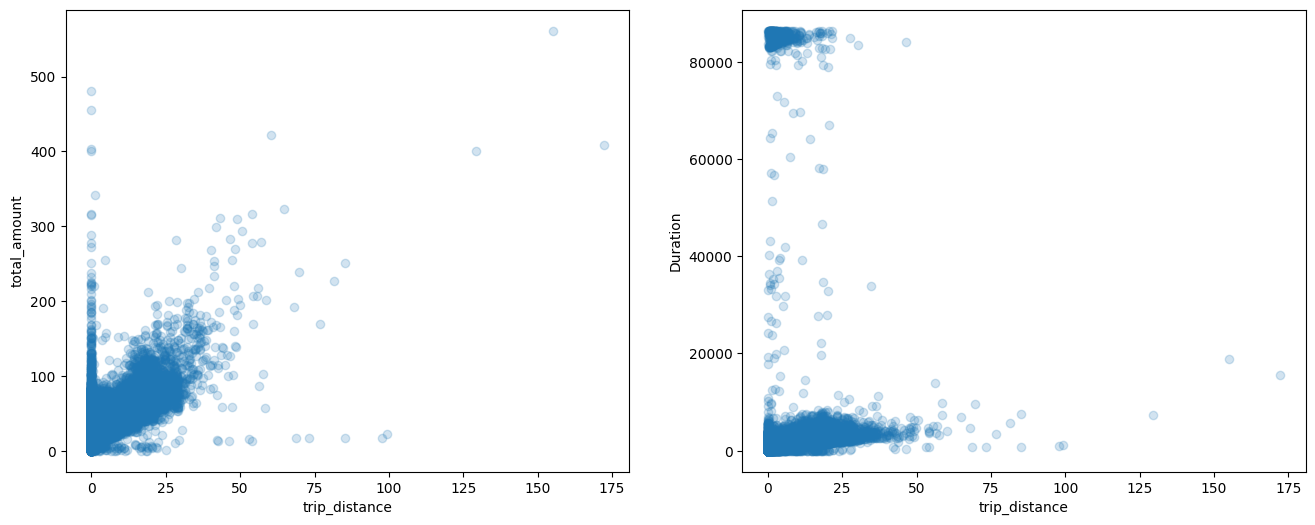

In [96]:
#There are some trips with 0 distances, these trips may be dropped
#There are some trips with trip distance>25 miles but with 0$ total amount, these trips could be discounted
#But most of the trips are linearly distributed with distance and fare
fig, axs = plt.subplots(1, 2, figsize=(16,6))
axs[0].scatter(yellow_taxi_df.trip_distance, yellow_taxi_df.total_amount, alpha=0.2)
axs[0].set_xlabel('trip_distance')
axs[0].set_ylabel('total_amount')

#Most of the trips are linearly distributed with distance and duration but there are some trips with >80000 duration
axs[1].scatter(yellow_taxi_df.trip_distance, yellow_taxi_df.Duration, alpha=0.2)
axs[1].set_xlabel('trip_distance')
axs[1].set_ylabel('Duration')

In [97]:
#Drop rows where trip distance is below 0.05 miles in order to analyze real trips
yellow_taxi_df[yellow_taxi_df['trip_distance']<0.05]

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,...,improvement_surcharge,total_amount,congestion_surcharge,airport_fee,PULocation_borough,DOLocation_borough,PULocation_zone,DOLocation_zone,Duration,speed_mph
137,1,2018-01-02 10:52:53,2018-01-02 10:52:57,1.0,0.00,1.0,N,48,48,2,...,0.3,3.30,NaN,NaN,Manhattan,Manhattan,Clinton East,Clinton East,4.0,0.000000
317,1,2018-01-03 14:10:24,2018-01-03 14:10:35,1.0,0.00,1.0,N,87,87,2,...,0.3,3.30,NaN,NaN,Manhattan,Manhattan,Financial District North,Financial District North,11.0,0.000000
846,1,2018-01-07 11:21:11,2018-01-07 11:22:21,1.0,0.00,1.0,N,249,249,2,...,0.3,3.80,NaN,NaN,Manhattan,Manhattan,West Village,West Village,70.0,0.000000
870,1,2018-01-07 15:20:00,2018-01-07 15:20:00,1.0,0.00,1.0,N,13,264,2,...,0.3,11.80,NaN,NaN,Manhattan,Unknown,Battery Park City,NV,0.0,NaN
886,1,2018-01-07 18:19:04,2018-01-07 18:19:16,1.0,0.00,2.0,N,166,166,1,...,0.3,63.56,NaN,NaN,Manhattan,Manhattan,Morningside Heights,Morningside Heights,12.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
304701,1,2023-01-30 13:33:25,2023-01-30 14:05:09,1.0,0.00,1.0,N,45,159,1,...,1.0,28.70,0.0,0.00,Manhattan,Bronx,Chinatown,Melrose South,1904.0,0.000000
304715,1,2023-01-30 17:54:46,2023-01-30 18:10:17,NaN,0.00,NaN,NaN,163,236,0,...,1.0,16.45,NaN,NaN,Manhattan,Manhattan,Midtown North,Upper East Side North,931.0,0.000000
304877,1,2023-01-31 15:19:42,2023-01-31 15:52:14,1.0,0.00,99.0,N,191,7,1,...,1.0,39.50,0.0,0.00,Queens,Queens,Queens Village,Astoria,1952.0,0.000000
304904,2,2023-01-31 07:10:58,2023-01-31 07:11:01,1.0,0.00,1.0,N,141,264,3,...,1.0,4.50,0.0,0.00,Manhattan,Unknown,Lenox Hill West,NV,3.0,0.000000


In [98]:
yellow_taxi_df=yellow_taxi_df.drop(yellow_taxi_df.query('trip_distance<0.05').index)

In [99]:
yellow_taxi_df.describe()

,VendorID,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee,Duration,speed_mph
count,299474.000000,290398.000000,299474.000000,290398.000000,299474.000000,299474.000000,299474.000000,299474.000000,299474.000000,299474.000000,299474.000000,299474.000000,299474.000000,299474.000000,227790.000000,104088.000000,299474.000000,2.994740e+05
mean,1.671684,1.482744,3.175303,1.110411,163.749574,160.937250,1.230668,13.456695,0.914926,0.497568,2.233982,0.388374,0.315261,19.044393,2.283696,0.086669,1009.132576,inf
std,0.504061,1.111567,4.070103,2.610996,66.461735,70.913635,0.505303,11.995597,1.185327,0.035716,2.707523,1.680477,0.102441,14.835727,0.702838,0.317531,3613.317813,NaN
min,1.000000,0.000000,0.050000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.171555e-03
25%,1.000000,1.000000,1.050000,1.000000,124.000000,107.000000,1.000000,6.500000,0.000000,0.500000,0.000000,0.000000,0.300000,10.800000,2.500000,0.000000,403.000000,7.933884e+00
50%,2.000000,1.000000,1.770000,1.000000,162.000000,162.000000,1.000000,9.500000,0.500000,0.500000,1.950000,0.000000,0.300000,14.550000,2.500000,0.000000,666.000000,1.056000e+01
75%,2.000000,2.000000,3.270000,1.000000,234.000000,234.000000,2.000000,15.000000,1.000000,0.500000,2.960000,0.000000,0.300000,20.760000,2.500000,0.000000,1086.000000,1.437897e+01
max,6.000000,6.000000,172.220000,99.000000,265.000000,265.000000,4.000000,434.500000,18.500000,2.540000,115.560000,96.550000,1.000000,561.490000,2.750000,1.250000,86392.000000,inf


3. Since the speed limit in NYC is max of 65 mph, I will focus on speed greater than this value

In [100]:
#Since the speed limit in NYC is max of 65 mph, I will drop rows where speed mph is greater than 70 mph
yellow_taxi_df[yellow_taxi_df['speed_mph']>70]

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,...,improvement_surcharge,total_amount,congestion_surcharge,airport_fee,PULocation_borough,DOLocation_borough,PULocation_zone,DOLocation_zone,Duration,speed_mph
812,1,2018-01-07 04:06:30,2018-01-07 04:06:39,1.0,1.40,1.0,N,132,132,3,...,0.3,3.80,NaN,NaN,Queens,Queens,JFK Airport,JFK Airport,9.0,560.00000
1751,1,2018-01-12 09:11:28,2018-01-12 09:11:32,1.0,0.90,1.0,N,239,239,1,...,0.3,5.80,NaN,NaN,Manhattan,Manhattan,Upper West Side South,Upper West Side South,4.0,810.00000
3909,1,2018-01-25 10:00:00,2018-01-25 10:00:03,1.0,1.10,1.0,N,90,90,2,...,0.3,3.30,NaN,NaN,Manhattan,Manhattan,Flatiron,Flatiron,3.0,1320.00000
4351,2,2018-01-28 20:27:41,2018-01-28 20:27:42,1.0,0.13,5.0,N,264,230,1,...,0.3,51.36,NaN,NaN,Unknown,Manhattan,NV,Times Sq/Theatre District,1.0,468.00000
5956,1,2018-02-06 00:41:15,2018-02-06 00:41:20,1.0,0.40,1.0,N,107,107,1,...,0.3,4.55,NaN,NaN,Manhattan,Manhattan,Gramercy,Gramercy,5.0,288.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
299931,1,2022-12-31 18:30:57,2022-12-31 18:31:07,1.0,0.60,1.0,N,246,246,3,...,1.0,7.00,2.5,0.0,Manhattan,Manhattan,West Chelsea/Hudson Yards,West Chelsea/Hudson Yards,10.0,216.00000
300992,1,2023-01-07 08:37:13,2023-01-07 08:37:33,1.0,14.80,5.0,N,229,229,1,...,1.0,9.00,0.0,0.0,Manhattan,Manhattan,Sutton Place/Turtle Bay North,Sutton Place/Turtle Bay North,20.0,2664.00000
302158,1,2023-01-14 10:38:08,2023-01-14 10:39:21,1.0,3.50,5.0,N,48,48,1,...,1.0,83.00,0.0,0.0,Manhattan,Manhattan,Clinton East,Clinton East,73.0,172.60274
302422,1,2023-01-16 10:43:59,2023-01-16 10:44:04,0.0,2.90,1.0,N,238,238,2,...,1.0,7.00,2.5,0.0,Manhattan,Manhattan,Upper West Side North,Upper West Side North,5.0,2088.00000


In [101]:
#Drop rows where speed mph is greater than 70 mph
yellow_taxi_df=yellow_taxi_df.drop(yellow_taxi_df.query('speed_mph>70').index)

In [102]:
yellow_taxi_df.describe()

,VendorID,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee,Duration,speed_mph
count,299106.000000,290132.000000,299106.000000,290132.000000,299106.000000,299106.000000,299106.000000,299106.000000,299106.000000,299106.000000,299106.000000,299106.000000,299106.000000,299106.000000,227573.000000,103972.000000,299106.000000,299106.000000
mean,1.670662,1.483001,3.170143,1.109178,163.711179,160.938510,1.230530,13.439203,0.915037,0.497691,2.233708,0.388406,0.315267,19.028265,2.284786,0.086550,1010.295236,12.109640
std,0.497979,1.111689,4.044798,2.611303,66.444439,70.911127,0.503933,11.959770,1.185239,0.034842,2.704021,1.680481,0.102455,14.805973,0.701233,0.317328,3615.375539,6.493036
min,1.000000,0.000000,0.050000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,0.008172
25%,1.000000,1.000000,1.050000,1.000000,122.000000,107.000000,1.000000,6.500000,0.000000,0.500000,0.000000,0.000000,0.300000,10.800000,2.500000,0.000000,404.000000,7.929515
50%,2.000000,1.000000,1.770000,1.000000,162.000000,162.000000,1.000000,9.500000,0.500000,0.500000,1.950000,0.000000,0.300000,14.510000,2.500000,0.000000,667.000000,10.553056
75%,2.000000,2.000000,3.260000,1.000000,234.000000,234.000000,2.000000,15.000000,1.000000,0.500000,2.960000,0.000000,0.300000,20.760000,2.500000,0.000000,1086.000000,14.355828
max,6.000000,6.000000,172.220000,99.000000,265.000000,265.000000,4.000000,434.500000,18.500000,2.540000,115.560000,96.550000,1.000000,561.490000,2.750000,1.250000,86392.000000,69.795918


4. There are some trips whose trip duration are greater than 80000 seconds, which is impossible
Since both taxi and FHV drivers are prohibited from transporting passengers for more than 10 hours in any 24-hour period(Monday-Sunday), I will drop rows with more than 40000 seconds

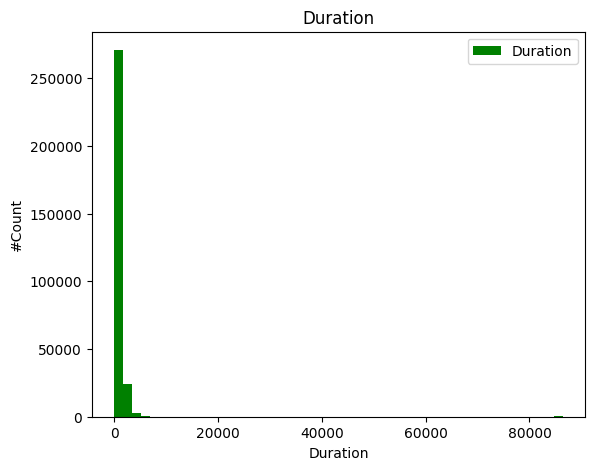

In [103]:
#Duration distribution
#There are some trips whose trip duration are greater than 80000 seconds.
plt.figure(figsize=(14,5))
plt.subplot(1,2,1)
plt.hist(yellow_taxi_df['Duration'], bins=50, color='g', label='Duration')
plt.title('Duration')
plt.xlabel('Duration') ; plt.ylabel('#Count') ; plt.legend(loc='upper right')

In [104]:
#I drop the data with trip duration is greater than 40000 because the trip duration will most probably not take 24 hours
yellow_taxi_df=yellow_taxi_df.drop(yellow_taxi_df.query('Duration>40000').index)

In [105]:
yellow_taxi_df.describe()

,VendorID,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee,Duration,speed_mph
count,298568.000000,289594.000000,298568.000000,289594.000000,298568.000000,298568.000000,298568.000000,298568.000000,298568.000000,298568.000000,298568.000000,298568.000000,298568.000000,298568.000000,227174.000000,103815.000000,298568.000000,298568.000000
mean,1.670068,1.482475,3.168428,1.109246,163.713777,160.947298,1.230396,13.432713,0.916041,0.497695,2.234209,0.388074,0.315274,19.022165,2.284892,0.086548,860.486656,12.131136
std,0.498231,1.110858,4.042738,2.613672,66.447324,70.905379,0.503998,11.945530,1.185871,0.034814,2.704025,1.679557,0.102477,14.793540,0.701076,0.317326,753.537021,6.479080
min,1.000000,0.000000,0.050000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,0.018410
25%,1.000000,1.000000,1.050000,1.000000,121.000000,107.000000,1.000000,6.500000,0.000000,0.500000,0.000000,0.000000,0.300000,10.800000,2.500000,0.000000,403.000000,7.944444
50%,2.000000,1.000000,1.760000,1.000000,162.000000,162.000000,1.000000,9.500000,0.500000,0.500000,1.950000,0.000000,0.300000,14.500000,2.500000,0.000000,666.000000,10.562347
75%,2.000000,2.000000,3.260000,1.000000,234.000000,234.000000,2.000000,15.000000,1.000000,0.500000,2.960000,0.000000,0.300000,20.760000,2.500000,0.000000,1083.000000,14.367713
max,6.000000,6.000000,172.220000,99.000000,265.000000,265.000000,4.000000,434.500000,18.500000,2.540000,115.560000,96.550000,1.000000,561.490000,2.750000,1.250000,39645.000000,69.795918


# Analysis 

For Analysis, I will also extract year, month, day and hour of the trip to make time series analysis

In [106]:
#Find the in which day the trip has been made
yellow_taxi_df['Day'] = yellow_taxi_df['tpep_pickup_datetime'].dt.day_name()
yellow_taxi_df['Month'] = yellow_taxi_df['tpep_pickup_datetime'].dt.month
yellow_taxi_df['Year'] = yellow_taxi_df['tpep_pickup_datetime'].dt.year
yellow_taxi_df['Month_Year'] = yellow_taxi_df['tpep_pickup_datetime'].dt.strftime('%Y-%m')
yellow_taxi_df

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,...,PULocation_borough,DOLocation_borough,PULocation_zone,DOLocation_zone,Duration,speed_mph,Day,Month,Year,Month_Year
0,2,2018-01-01 12:02:01,2018-01-01 12:04:05,1.0,0.53,1.0,N,142,163,1,...,Manhattan,Manhattan,Lincoln Square East,Midtown North,124.0,15.387097,Monday,1,2018,2018-01
1,2,2018-01-01 12:26:48,2018-01-01 12:31:29,1.0,1.05,1.0,N,140,236,1,...,Manhattan,Manhattan,Lenox Hill East,Upper East Side North,281.0,13.451957,Monday,1,2018,2018-01
2,2,2018-01-01 01:28:34,2018-01-01 01:39:38,4.0,1.83,1.0,N,211,158,1,...,Manhattan,Manhattan,SoHo,Meatpacking/West Village West,664.0,9.921687,Monday,1,2018,2018-01
3,1,2018-01-01 08:51:59,2018-01-01 09:01:45,1.0,2.30,1.0,N,249,4,2,...,Manhattan,Manhattan,West Village,Alphabet City,586.0,14.129693,Monday,1,2018,2018-01
4,2,2018-01-01 01:00:19,2018-01-01 01:14:16,1.0,3.06,1.0,N,186,142,1,...,Manhattan,Manhattan,Penn Station/Madison Sq West,Lincoln Square East,837.0,13.161290,Monday,1,2018,2018-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
304973,1,2023-01-31 00:11:27,2023-01-31 00:38:56,1.0,9.90,99.0,N,48,47,1,...,Manhattan,Bronx,Clinton East,Claremont/Bathgate,1649.0,21.613099,Tuesday,1,2023,2023-01
304974,2,2023-01-31 16:06:08,2023-01-31 16:52:18,1.0,8.27,1.0,N,87,75,2,...,Manhattan,Manhattan,Financial District North,East Harlem South,2770.0,10.748014,Tuesday,1,2023,2023-01
304975,2,2023-01-31 15:31:38,2023-01-31 15:44:48,1.0,0.71,1.0,N,236,236,2,...,Manhattan,Manhattan,Upper East Side North,Upper East Side North,790.0,3.235443,Tuesday,1,2023,2023-01
304976,1,2023-01-31 20:35:17,2023-01-31 20:42:56,1.0,1.80,1.0,N,141,170,2,...,Manhattan,Manhattan,Lenox Hill West,Murray Hill,459.0,14.117647,Tuesday,1,2023,2023-01


In [107]:
#Find the in which hour trip is started
yellow_taxi_df['Hour'] = yellow_taxi_df['tpep_pickup_datetime'].dt.hour
yellow_taxi_df

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,...,DOLocation_borough,PULocation_zone,DOLocation_zone,Duration,speed_mph,Day,Month,Year,Month_Year,Hour
0,2,2018-01-01 12:02:01,2018-01-01 12:04:05,1.0,0.53,1.0,N,142,163,1,...,Manhattan,Lincoln Square East,Midtown North,124.0,15.387097,Monday,1,2018,2018-01,12
1,2,2018-01-01 12:26:48,2018-01-01 12:31:29,1.0,1.05,1.0,N,140,236,1,...,Manhattan,Lenox Hill East,Upper East Side North,281.0,13.451957,Monday,1,2018,2018-01,12
2,2,2018-01-01 01:28:34,2018-01-01 01:39:38,4.0,1.83,1.0,N,211,158,1,...,Manhattan,SoHo,Meatpacking/West Village West,664.0,9.921687,Monday,1,2018,2018-01,1
3,1,2018-01-01 08:51:59,2018-01-01 09:01:45,1.0,2.30,1.0,N,249,4,2,...,Manhattan,West Village,Alphabet City,586.0,14.129693,Monday,1,2018,2018-01,8
4,2,2018-01-01 01:00:19,2018-01-01 01:14:16,1.0,3.06,1.0,N,186,142,1,...,Manhattan,Penn Station/Madison Sq West,Lincoln Square East,837.0,13.161290,Monday,1,2018,2018-01,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
304973,1,2023-01-31 00:11:27,2023-01-31 00:38:56,1.0,9.90,99.0,N,48,47,1,...,Bronx,Clinton East,Claremont/Bathgate,1649.0,21.613099,Tuesday,1,2023,2023-01,0
304974,2,2023-01-31 16:06:08,2023-01-31 16:52:18,1.0,8.27,1.0,N,87,75,2,...,Manhattan,Financial District North,East Harlem South,2770.0,10.748014,Tuesday,1,2023,2023-01,16
304975,2,2023-01-31 15:31:38,2023-01-31 15:44:48,1.0,0.71,1.0,N,236,236,2,...,Manhattan,Upper East Side North,Upper East Side North,790.0,3.235443,Tuesday,1,2023,2023-01,15
304976,1,2023-01-31 20:35:17,2023-01-31 20:42:56,1.0,1.80,1.0,N,141,170,2,...,Manhattan,Lenox Hill West,Murray Hill,459.0,14.117647,Tuesday,1,2023,2023-01,20


In [108]:
day_of_week = yellow_taxi_df.groupby(['Day'])['Day'].count().reset_index(name='Count').sort_values(by='Count',ascending=False)
day_of_week

,Day,Count
0,Friday,46367
4,Thursday,46278
6,Wednesday,45458
5,Tuesday,43900
2,Saturday,42031
1,Monday,39495
3,Sunday,35039


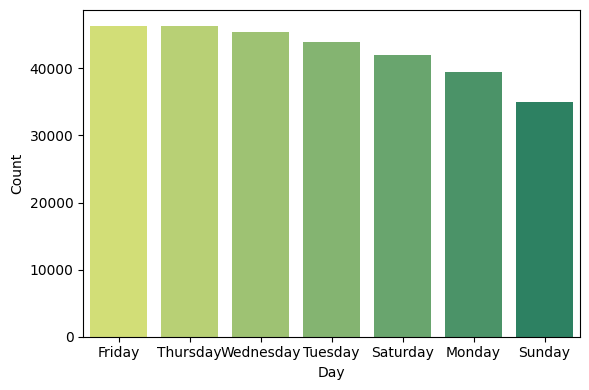

In [109]:
#Most of the trips are made in Friday and sunday is the least busy day
plt.figure(figsize=(6,4))
day_of_week_fig=sns.barplot(data=day_of_week, x='Day', y="Count", palette='summer_r')
plt.tight_layout()

In [110]:
hour_of_day = yellow_taxi_df.groupby(['Hour'])['Hour'].count().reset_index(name='Count').sort_values(by='Hour',ascending=True)
hour_of_day

,Hour,Count
0,0,7601
1,1,5009
2,2,3467
3,3,2358
4,4,1957
5,5,2403
6,6,5785
7,7,10238
8,8,13337
9,9,13917


<ipython-input-111-7541592ae719>:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=hour_of_day, x="Hour", y="Count", ci=None, color="green", marker='o')


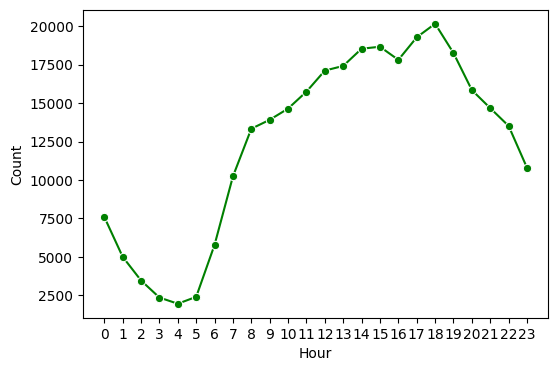

In [111]:
#Most of the trips are made aound 6pm, most likely after work
plt.figure(figsize=(6,4))
sns.lineplot(data=hour_of_day, x="Hour", y="Count", ci=None, color="green", marker='o')
plt.xticks(hour_of_day['Hour'], hour_of_day['Hour'])
plt.show()

In [112]:
seasonality_df=yellow_taxi_df.groupby(['Month_Year'])['Month_Year'].count().reset_index(name='Count').sort_values(by='Month_Year',ascending=True)
seasonality_df

,Month_Year,Count
0,2018-01,4949
1,2018-02,4959
2,2018-03,4948
3,2018-04,4945
4,2018-05,4949
...,...,...
56,2022-09,4860
57,2022-10,4860
58,2022-11,4856
59,2022-12,4841


<ipython-input-113-7f244a460864>:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  seasonality_df_fig=sns.lineplot(data=seasonality_df, x="Month_Year", y="Count", ci=None, color="green", marker='o')
<ipython-input-113-7f244a460864>:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  seasonality_df_fig.set_xticklabels(seasonality_df_fig.get_xticklabels(), rotation=90)


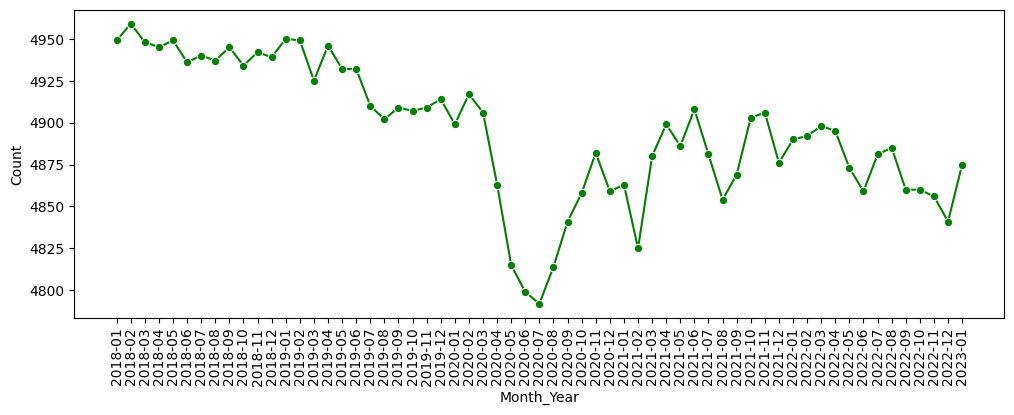

In [113]:
#There is a decrease in the number of trips from 2018 to 2020. And it reaches lowest point at 2020 summer season, It could be the result of pandemic.
#After the lowest month the number of trips starts to increase, but still number of trips is lower than before
plt.figure(figsize=(12,4))
seasonality_df_fig=sns.lineplot(data=seasonality_df, x="Month_Year", y="Count", ci=None, color="green", marker='o')
seasonality_df_fig.set_xticklabels(seasonality_df_fig.get_xticklabels(), rotation=90)
plt.xticks(seasonality_df['Month_Year'], seasonality_df['Month_Year'])
plt.show()

In [114]:
number_of_passenger = yellow_taxi_df.groupby(['passenger_count'])['passenger_count'].count().reset_index(name='Count').sort_values(by='Count',ascending=False)
number_of_passenger['Percentage']=(number_of_passenger.Count/number_of_passenger.Count.sum())
number_of_passenger

,passenger_count,Count,Percentage
1,1.0,210328,0.726286
2,2.0,42792,0.147765
3,3.0,11496,0.039697
5,5.0,8854,0.030574
6,6.0,5743,0.019831
0,0.0,5334,0.018419
4,4.0,5047,0.017428


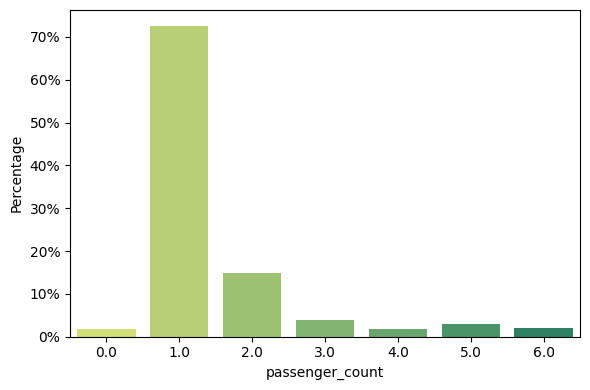

In [115]:
#Most of the trip are made with 1 passenger, and small portion of trips are flaged as 0 passenger by the drivers
plt.figure(figsize=(6,4))
passenger_count_fig=sns.barplot(data=number_of_passenger, x='passenger_count', y="Percentage", palette='summer_r')
plt.gca().yaxis.set_major_formatter(PercentFormatter(1.0))
plt.tight_layout()

   VendorID   Count  Percentage
1         2  197291    0.660791
0         1  100525    0.336690
2         4     494    0.001655
4         6     256    0.000857
3         5       2    0.000007


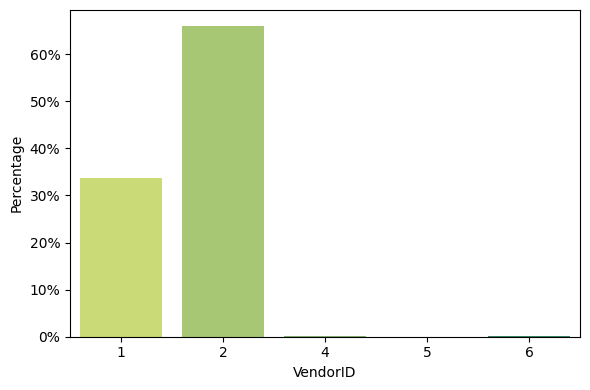

In [116]:
#Most of the trip are provided by Vendor 2 (VeriFone Inc.), also there are some vendors that are not mentioned before like 4,5,6
vendor_df = yellow_taxi_df.groupby(['VendorID'])['VendorID'].count().reset_index(name='Count').sort_values(by='Count',ascending=False)
vendor_df['Percentage']=(vendor_df.Count/vendor_df.Count.sum())
print(vendor_df)
plt.figure(figsize=(6,4))
vendor_fig=sns.barplot(data=vendor_df, x='VendorID', y="Percentage", palette='summer_r')
plt.gca().yaxis.set_major_formatter(PercentFormatter(1.0))
plt.tight_layout()

   payment_type   Count  Percentage
1             1  213866    0.716306
2             2   74134    0.248299
0             0    8974    0.030057
3             3    1153    0.003862
4             4     441    0.001477


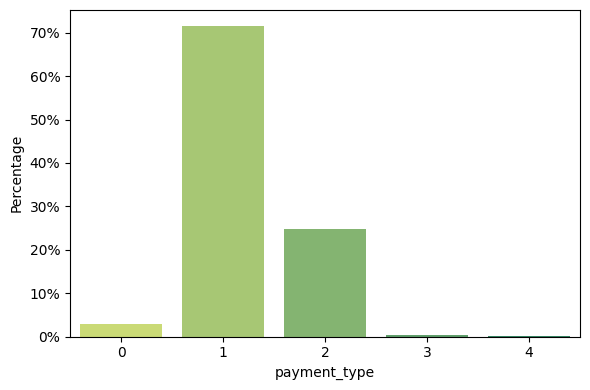

In [117]:
#Most of the trips are paid with card, and then cash, also there is a payment_type that is not mentioned before like 0
payment_df = yellow_taxi_df.groupby(['payment_type'])['payment_type'].count().reset_index(name='Count').sort_values(by='Count',ascending=False)
payment_df['Percentage']=(payment_df.Count/payment_df.Count.sum())
print(payment_df)
plt.figure(figsize=(6,4))
payment_fig=sns.barplot(data=payment_df, x='payment_type', y="Percentage", palette='summer_r')
plt.gca().yaxis.set_major_formatter(PercentFormatter(1.0))
plt.tight_layout()

   RatecodeID   Count  Percentage
0         1.0  280898    0.969972
1         2.0    6963    0.024044
4         5.0     666    0.002300
2         3.0     571    0.001972
3         4.0     292    0.001008
5        99.0     204    0.000704


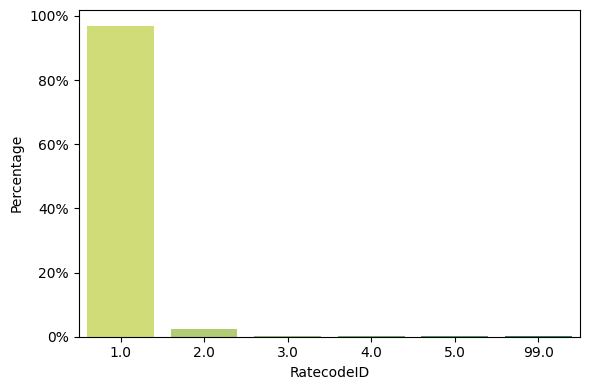

In [118]:
#Most of the trips are calculated as Standard rate, also there is a rate code that is not mentioned before like 99
ratecode_df = yellow_taxi_df.groupby(['RatecodeID'])['RatecodeID'].count().reset_index(name='Count').sort_values(by='Count',ascending=False)
ratecode_df['Percentage']=(ratecode_df.Count/ratecode_df.Count.sum())
print(ratecode_df)
plt.figure(figsize=(6,4))
ratecode_fig=sns.barplot(data=ratecode_df, x='RatecodeID', y="Percentage", palette='summer_r')
plt.gca().yaxis.set_major_formatter(PercentFormatter(1.0))
plt.tight_layout()

count    298568.000000
mean          3.168428
std           4.042738
min           0.050000
25%           1.050000
50%           1.760000
75%           3.260000
max         172.220000
Name: trip_distance, dtype: float64
19.52


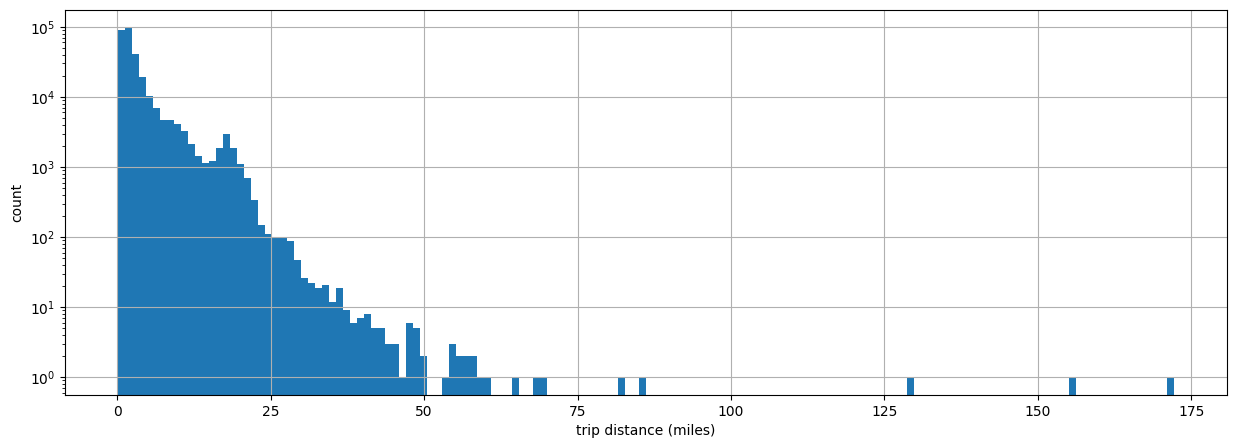

In [119]:
#Trip distances are mostly distributed around 3 miles, but there some long trip distances as well.
print(yellow_taxi_df['trip_distance'].describe())
print(np.percentile(yellow_taxi_df.trip_distance, 99))
ax = yellow_taxi_df['trip_distance'].hist(bins=150, figsize=(15,5))
ax.set_yscale('log')
ax.set_xlabel("trip distance (miles)")
ax.set_ylabel("count")
plt.show()

count    298568.000000
mean        860.486656
std         753.537021
min           3.000000
25%         403.000000
50%         666.000000
75%        1083.000000
max       39645.000000
Name: Duration, dtype: float64
3563.0


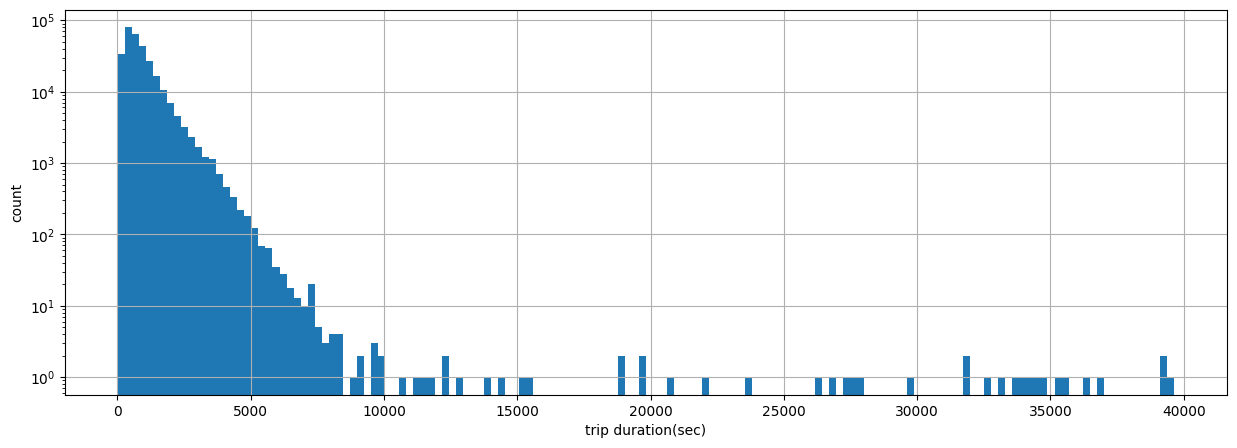

In [120]:
#Trip durations are mostly distributed around 15-20 min, but there some long trip durations as well.
print(yellow_taxi_df['Duration'].describe())
print(np.percentile(yellow_taxi_df.Duration, 99))
ax = yellow_taxi_df['Duration'].hist(bins=150, figsize=(15,5))
ax.set_yscale('log')
ax.set_xlabel("trip duration(sec)")
ax.set_ylabel("count")
plt.show()

count    298568.000000
mean         19.022165
std          14.793540
min           0.000000
25%          10.800000
50%          14.500000
75%          20.760000
max         561.490000
Name: total_amount, dtype: float64
19.52


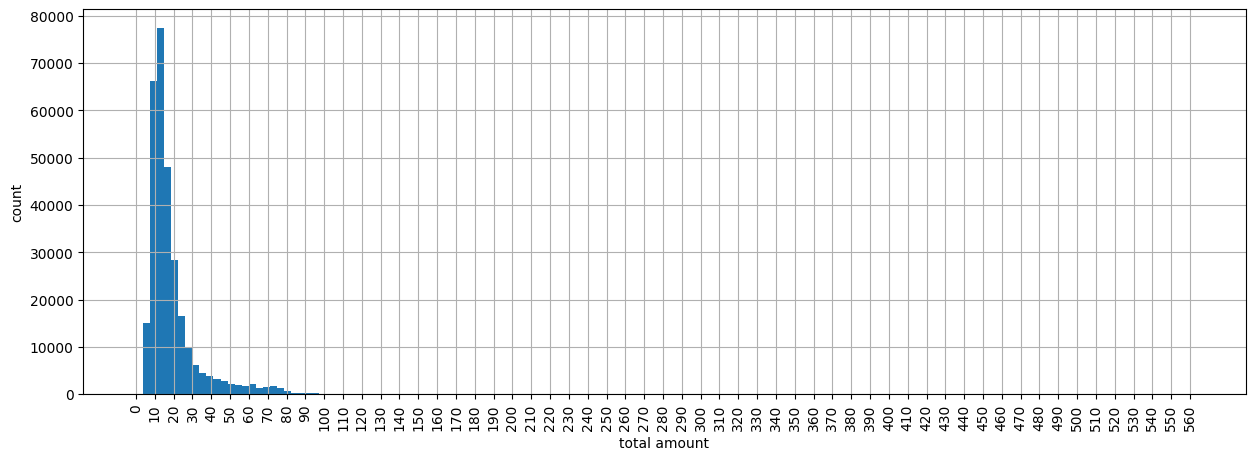

In [121]:
#Trip amounts are mostly distributed around 20$, but there some higher amounts as well.
print(yellow_taxi_df['total_amount'].describe())
print(np.percentile(yellow_taxi_df.trip_distance, 99))
ax = yellow_taxi_df['total_amount'].hist(bins=150, figsize=(15,5))
#ax.set_yscale('log')
ax.set_xlabel("total amount")
ax.set_ylabel("count")
plt.xticks(np.arange(min(yellow_taxi_df['total_amount']), max(yellow_taxi_df['total_amount'])+1, 10))
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.show()

In [122]:
#Most visited PickUp Locations are mainly in Manhattan 
pu_location_borough = yellow_taxi_df.groupby(['PULocation_borough'])['PULocation_borough'].count().reset_index(name='Count').sort_values(by='Count',ascending=False)
pu_location_borough['Percentage']=(pu_location_borough.Count/ratecode_df.Count.sum())
print(pu_location_borough)

pu_location_zone = yellow_taxi_df.groupby(['PULocation_zone'])['PULocation_zone'].count().reset_index(name='Count').sort_values(by='Count',ascending=False)
pu_location_zone['Percentage']=(pu_location_zone.Count/ratecode_df.Count.sum())
print(pu_location_zone)

  PULocation_borough   Count  Percentage
3          Manhattan  270537    0.934194
4             Queens   19768    0.068261
1           Brooklyn    3888    0.013426
6            Unknown    3137    0.010832
0              Bronx    1202    0.004151
5      Staten Island      29    0.000100
2                EWR       7    0.000024
                  PULocation_zone  Count  Percentage
221         Upper East Side South  13769    0.047546
220         Upper East Side North  12590    0.043475
147                Midtown Center  11266    0.038903
173  Penn Station/Madison Sq West  10536    0.036382
148                  Midtown East   9977    0.034452
..                            ...    ...         ...
104   Heartland Village/Todt Hill      1    0.000003
2                   Arden Heights      1    0.000003
87      Forest Park/Highland Park      1    0.000003
97            Green-Wood Cemetery      1    0.000003
106               Highbridge Park      1    0.000003

[247 rows x 3 columns]


In [123]:
#Most visited Dropoff Locations are mainly in Manhattan 
do_location_borough = yellow_taxi_df.groupby(['DOLocation_borough'])['DOLocation_borough'].count().reset_index(name='Count').sort_values(by='Count',ascending=False)
do_location_borough['Percentage']=(do_location_borough.Count/ratecode_df.Count.sum())
print(do_location_borough)

do_location_zone = yellow_taxi_df.groupby(['PULocation_zone'])['PULocation_zone'].count().reset_index(name='Count').sort_values(by='Count',ascending=False)
do_location_zone['Percentage']=(do_location_zone.Count/ratecode_df.Count.sum())
print(do_location_zone)

  DOLocation_borough   Count  Percentage
3          Manhattan  264680    0.913969
4             Queens   14377    0.049645
1           Brooklyn   12900    0.044545
0              Bronx    3188    0.011009
6            Unknown    2778    0.009593
2                EWR     550    0.001899
5      Staten Island      95    0.000328
                  PULocation_zone  Count  Percentage
221         Upper East Side South  13769    0.047546
220         Upper East Side North  12590    0.043475
147                Midtown Center  11266    0.038903
173  Penn Station/Madison Sq West  10536    0.036382
148                  Midtown East   9977    0.034452
..                            ...    ...         ...
104   Heartland Village/Todt Hill      1    0.000003
2                   Arden Heights      1    0.000003
87      Forest Park/Highland Park      1    0.000003
97            Green-Wood Cemetery      1    0.000003
106               Highbridge Park      1    0.000003

[247 rows x 3 columns]


In [124]:
#5 percent of trips are started from Airports
airport_pu=yellow_taxi_df[yellow_taxi_df['PULocation_zone'].str.contains('Airport')==True].groupby(['PULocation_zone'])['PULocation_zone'].count().reset_index(name='Count').sort_values(by='Count',ascending=False)
airport_pu['Percentage']=airport_pu.Count/yellow_taxi_df['VendorID'].count()
print(airport_pu)

#2 percent of trips are finished at Airports
airport_do=yellow_taxi_df[yellow_taxi_df['DOLocation_zone'].str.contains('Airport')==True].groupby(['DOLocation_zone'])['DOLocation_zone'].count().reset_index(name='Count').sort_values(by='Count',ascending=False)
airport_do['Percentage']=airport_do.Count/yellow_taxi_df['VendorID'].count()
print(airport_do)

     PULocation_zone  Count  Percentage
0        JFK Airport   9317    0.031206
1  LaGuardia Airport   6952    0.023284
2     Newark Airport      7    0.000023
     DOLocation_zone  Count  Percentage
1  LaGuardia Airport   2758    0.009237
0        JFK Airport   2249    0.007533
2     Newark Airport    550    0.001842


In [125]:
#JFK Airport ranks first with 57% of all trips originating from airports.
airport_pu=yellow_taxi_df[yellow_taxi_df['PULocation_zone'].str.contains('Airport')==True].groupby(['PULocation_zone'])['PULocation_zone'].count().reset_index(name='Count').sort_values(by='Count',ascending=False)
airport_pu['Percentage']=airport_pu.Count/airport_pu.Count.sum()
airport_pu

,PULocation_zone,Count,Percentage
0,JFK Airport,9317,0.572438
1,LaGuardia Airport,6952,0.427132
2,Newark Airport,7,0.000430


In [126]:
#Among trips completed with airport drop-offs, the most frequently visited airport is LaGuardia Airport, accounting for 49%.
airport_do=yellow_taxi_df[yellow_taxi_df['DOLocation_zone'].str.contains('Airport')==True].groupby(['DOLocation_zone'])['DOLocation_zone'].count().reset_index(name='Count').sort_values(by='Count',ascending=False)
airport_do['Percentage']=airport_do.Count/airport_do.Count.sum()
airport_do

,DOLocation_zone,Count,Percentage
1,LaGuardia Airport,2758,0.496311
0,JFK Airport,2249,0.404715
2,Newark Airport,550,0.098974


In [127]:
#People prefer to share taxi when they need to pay more
passenger_total_fare = yellow_taxi_df.groupby(['passenger_count'])['total_amount'].mean().reset_index(name='Total_Fare_Avg').sort_values(by='Total_Fare_Avg',ascending=False)
passenger_total_fare

,passenger_count,Total_Fare_Avg
2,2.0,19.849260
4,4.0,19.634248
3,3.0,19.313106
1,1.0,18.352702
5,5.0,18.286604
6,6.0,18.276986
0,0.0,18.178905


In [128]:
#People prefer to share taxi when they need to make a long trip
passenger_trip_dist = yellow_taxi_df.groupby(['passenger_count'])['trip_distance'].mean().reset_index(name='Trip_Distance_Avg').sort_values(by='Trip_Distance_Avg',ascending=False)
passenger_trip_dist

,passenger_count,Trip_Distance_Avg
2,2.0,3.375223
4,4.0,3.324979
3,3.0,3.233622
5,5.0,3.060187
6,6.0,3.037231
1,1.0,2.985917
0,0.0,2.872852


<ipython-input-129-1a949114f5f3>:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=hourly_avg_trip_dist, x="Hour", y="Hourly_Trip_Distance_Avg", ci=None, color="green", marker='o')


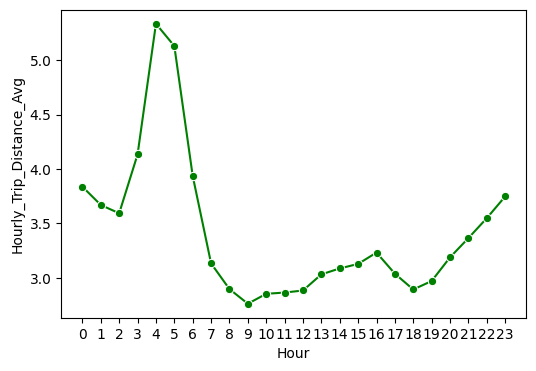

In [129]:
#Trip distance is highest in the early morning, most probably due to airport trips 
hourly_avg_trip_dist = yellow_taxi_df.groupby(['Hour'])['trip_distance'].mean().reset_index(name='Hourly_Trip_Distance_Avg').sort_values(by='Hour',ascending=True)

plt.figure(figsize=(6,4))
sns.lineplot(data=hourly_avg_trip_dist, x="Hour", y="Hourly_Trip_Distance_Avg", ci=None, color="green", marker='o')
plt.xticks(hour_of_day['Hour'], hour_of_day['Hour'])
plt.show()

In [130]:
#On Sunday people may prefer to visit long distance places, but in weekdays most of the trips can be done for work
day_of_week_avg_trip_dist = yellow_taxi_df.groupby(['Day'])['trip_distance'].mean().reset_index(name='Day_Of_Week_Trip_Distance_Avg').sort_values(by='Day_Of_Week_Trip_Distance_Avg',ascending=False)
day_of_week_avg_trip_dist

,Day,Day_Of_Week_Trip_Distance_Avg
3,Sunday,3.578906
1,Monday,3.252808
4,Thursday,3.121266
0,Friday,3.116257
2,Saturday,3.105177
5,Tuesday,3.069907
6,Wednesday,3.033571


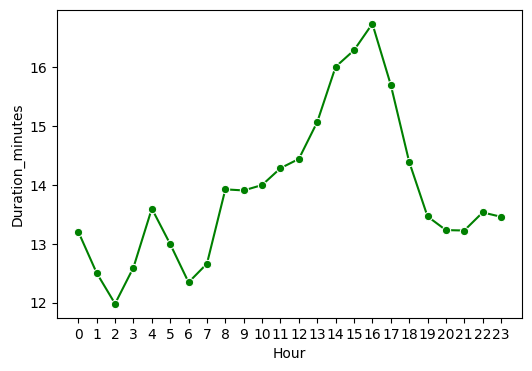

In [131]:
#Trip duration is longer, possibly due to traffic during rush hour
hourly_avg_duration = yellow_taxi_df.groupby(['Hour'])['Duration'].mean().reset_index(name='Hourly_duration_Avg').sort_values(by='Hour',ascending=True)
hourly_avg_duration['Duration_minutes']=hourly_avg_duration['Hourly_duration_Avg']/60

plt.figure(figsize=(6,4))
sns.lineplot(data=hourly_avg_duration, x="Hour", y="Duration_minutes",  color="green", marker='o')
plt.xticks(hourly_avg_duration['Hour'], hourly_avg_duration['Hour'])
plt.show()

In [132]:
#Since traffic is lowest on Sunday, the trip duration is also lowest
day_of_week_avg_duration= yellow_taxi_df.groupby(['Day'])['Duration'].mean().reset_index(name='Day_Of_Week_Duration_Avg').sort_values(by='Day_Of_Week_Duration_Avg', ascending=False)
day_of_week_avg_duration['Duration_minutes']=day_of_week_avg_duration['Day_Of_Week_Duration_Avg']/60
day_of_week_avg_duration

,Day,Day_Of_Week_Duration_Avg,Duration_minutes
4,Thursday,911.701932,15.195032
0,Friday,893.434943,14.890582
6,Wednesday,882.457433,14.707624
5,Tuesday,864.149408,14.402490
1,Monday,827.510368,13.791839
2,Saturday,813.838881,13.563981
3,Sunday,809.276720,13.487945


<ipython-input-133-2222963fe005>:7: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  payment_over_years_fig=sns.lineplot(data=payment_over_years, x="Month_Year", y="Count", hue=payment_over_years['payment_type'], ci=None, palette='tab10', marker='o')
<ipython-input-133-2222963fe005>:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  payment_over_years_fig.set_xticklabels(payment_over_years_fig.get_xticklabels(), rotation=90)


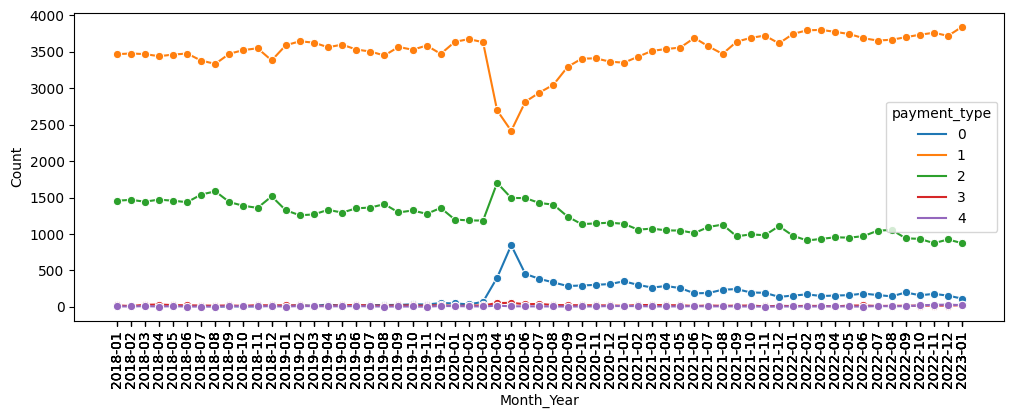

In [133]:
# While the trip number reach to lowest point around 202006, payment with credit card decreases, cash and the 0 payment type increases,
#After the lowest point credit card usage increases and cash usage decreases
#There is also a line for payment_type 0, which could be incorrect data from a vendor or a new payment_type may arised
payment_over_years= yellow_taxi_df.groupby(['Month_Year','payment_type'])['payment_type'].count().reset_index(name='Count').sort_values(by='Month_Year')

plt.figure(figsize=(12,4))
payment_over_years_fig=sns.lineplot(data=payment_over_years, x="Month_Year", y="Count", hue=payment_over_years['payment_type'], ci=None, palette='tab10', marker='o')
payment_over_years_fig.set_xticklabels(payment_over_years_fig.get_xticklabels(), rotation=90)
plt.xticks(payment_over_years['Month_Year'], payment_over_years['Month_Year'])
plt.show()


<Axes: xlabel='payment_type', ylabel='Payment_Type_Total_Amount_Avg'>

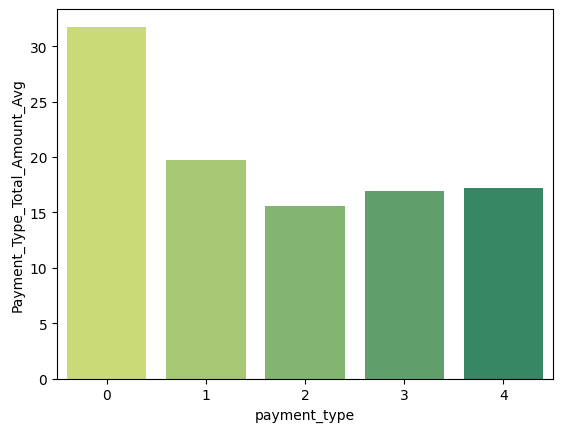

In [134]:
#Except payment_type 0, the total amount id highest in card payment
payment_type_avg_total_fare= yellow_taxi_df.groupby(['payment_type'])['total_amount'].mean().reset_index(name='Payment_Type_Total_Amount_Avg').sort_values(by='Payment_Type_Total_Amount_Avg',ascending=False)
sns.barplot(data=payment_type_avg_total_fare, x='payment_type', y="Payment_Type_Total_Amount_Avg", palette='summer_r')

In [135]:
#Trips with tips
yellow_taxi_df.loc[yellow_taxi_df['tip_amount'] == 0, 'tip_flag'] = 0
yellow_taxi_df.loc[yellow_taxi_df['tip_amount'] > 0, 'tip_flag'] = 1
trips_with_tips = yellow_taxi_df.groupby(['tip_flag'])['tip_flag'].count().reset_index(name='Count').sort_values(by='Count',ascending=True)
trips_with_tips['Percentage']=trips_with_tips.Count/trips_with_tips.Count.sum()
trips_with_tips

,tip_flag,Count,Percentage
0,0.0,87141,0.291863
1,1.0,211427,0.708137


<ipython-input-136-36ef0b39147c>:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=trips_with_tips[trips_with_tips['tip_flag']==1], x="Hour", y="Percentage", ci=None, color="green", marker='o')


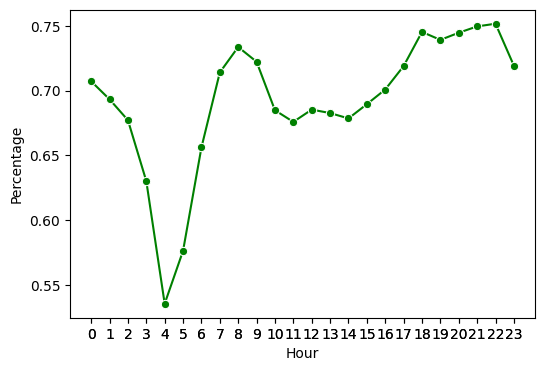

<ipython-input-136-36ef0b39147c>:14: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=trips_with_tips[trips_with_tips['tip_flag']==1], x="Day", y="Percentage", ci=None, color="green", marker='o')


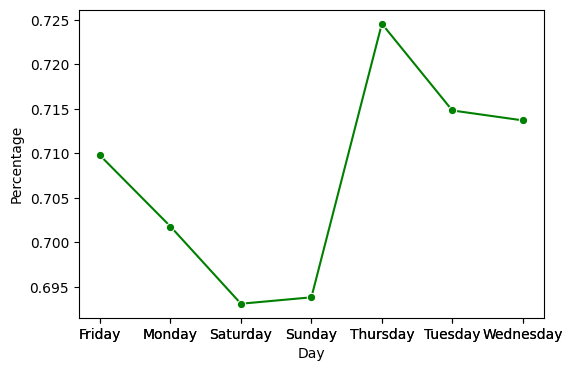

In [136]:
#People tend to give tip in the late night hours and weekdays
trips_with_tips = yellow_taxi_df.groupby(['tip_flag','Hour'])['tip_flag'].count().reset_index(name='Count').sort_values(by='Hour',ascending=True)
trips_with_tips['Percentage']=trips_with_tips.Count/trips_with_tips.groupby('Hour')['Count'].transform('sum')

plt.figure(figsize=(6,4))
sns.lineplot(data=trips_with_tips[trips_with_tips['tip_flag']==1], x="Hour", y="Percentage", ci=None, color="green", marker='o')
plt.xticks(trips_with_tips['Hour'], trips_with_tips['Hour'])
plt.show()

trips_with_tips = yellow_taxi_df.groupby(['tip_flag','Day'])['tip_flag'].count().reset_index(name='Count').sort_values(by='Day',ascending=True)
trips_with_tips['Percentage']=trips_with_tips.Count/trips_with_tips.groupby('Day')['Count'].transform('sum')

plt.figure(figsize=(6,4))
sns.lineplot(data=trips_with_tips[trips_with_tips['tip_flag']==1], x="Day", y="Percentage", ci=None, color="green", marker='o')
plt.xticks(trips_with_tips['Day'], trips_with_tips['Day'])
plt.show()

<ipython-input-137-a3fe71f8c801>:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=trips_with_tips[trips_with_tips['tip_flag']==1], x="Hour", y="Avg", ci=None, color="green", marker='o')


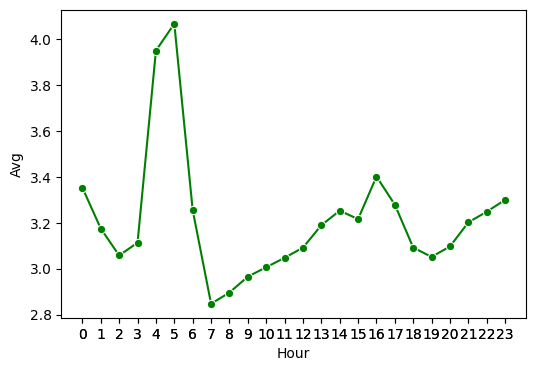

<ipython-input-137-a3fe71f8c801>:12: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=trips_with_tips[trips_with_tips['tip_flag']==1], x="Day", y="Avg", ci=None, color="green", marker='o')


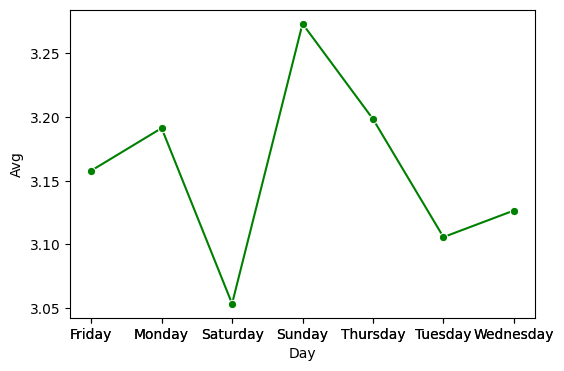

In [137]:
#People tend to give high amount of tips in the eary morning hours and on Sunday
trips_with_tips = yellow_taxi_df.groupby(['tip_flag','Hour'])['tip_amount'].mean().reset_index(name='Avg').sort_values(by='Hour',ascending=True)

plt.figure(figsize=(6,4))
sns.lineplot(data=trips_with_tips[trips_with_tips['tip_flag']==1], x="Hour", y="Avg", ci=None, color="green", marker='o')
plt.xticks(trips_with_tips['Hour'], trips_with_tips['Hour'])
plt.show()

trips_with_tips = yellow_taxi_df.groupby(['tip_flag','Day'])['tip_amount'].mean().reset_index(name='Avg').sort_values(by='Day',ascending=True)

plt.figure(figsize=(6,4))
sns.lineplot(data=trips_with_tips[trips_with_tips['tip_flag']==1], x="Day", y="Avg", ci=None, color="green", marker='o')
plt.xticks(trips_with_tips['Day'], trips_with_tips['Day'])
plt.show()

<ipython-input-138-dd32e93daaa4>:12: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=trips_with_tips[trips_with_tips['tip_flag']==1], x="distance_bins", y="Percentage", ci=None, color="green", marker='o')


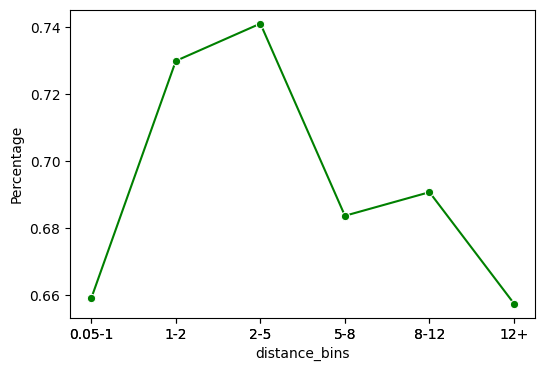

<ipython-input-138-dd32e93daaa4>:20: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=trips_with_tips[trips_with_tips['tip_flag']==1], x="distance_bins", y="Avg", ci=None, color="green", marker='o')


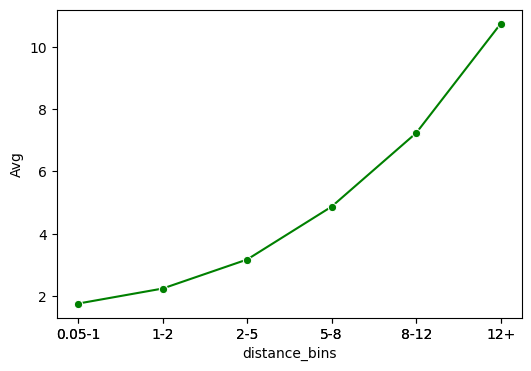

In [138]:
#People do not tend to give tips with long distance trips compared to other trip distances, but they do tend to give high amount of tips when they do
bins = [0.05, 1, 2, 5, 8, 12, 200]
groups = ['0.05-1', '1-2', '2-5', '5-8', '8-12', '12+' ]

yellow_taxi_df['distance_bins'] = pd.cut(yellow_taxi_df['trip_distance'], bins, labels=groups, include_lowest=True)
pd.value_counts(yellow_taxi_df['distance_bins'])

trips_with_tips = yellow_taxi_df.groupby(['tip_flag','distance_bins'])['tip_flag'].count().reset_index(name='Count').sort_values(by='distance_bins',ascending=True)
trips_with_tips['Percentage']=trips_with_tips.Count/trips_with_tips.groupby('distance_bins')['Count'].transform('sum')

plt.figure(figsize=(6,4))
sns.lineplot(data=trips_with_tips[trips_with_tips['tip_flag']==1], x="distance_bins", y="Percentage", ci=None, color="green", marker='o')
plt.xticks(trips_with_tips['distance_bins'], trips_with_tips['distance_bins'])
plt.show()


trips_with_tips = yellow_taxi_df.groupby(['tip_flag','distance_bins'])['tip_amount'].mean().reset_index(name='Avg').sort_values(by='distance_bins',ascending=True)

plt.figure(figsize=(6,4))
sns.lineplot(data=trips_with_tips[trips_with_tips['tip_flag']==1], x="distance_bins", y="Avg", ci=None, color="green", marker='o')
plt.xticks(trips_with_tips['distance_bins'], trips_with_tips['distance_bins'])
plt.show()

In [139]:
#top20 most popular routes zone info
most_popular_routes = yellow_taxi_df.groupby(['PULocation_zone','DOLocation_zone'])['PULocation_zone'].count().reset_index(name='Count').sort_values(by='Count',ascending=False)
most_popular_routes['Percentage']=most_popular_routes.Count/most_popular_routes.Count.sum()
top20_most_popular_routes=most_popular_routes.nlargest(20, 'Count')
top20_most_popular_routes

,PULocation_zone,DOLocation_zone,Count,Percentage
11666,Upper East Side South,Upper East Side North,2061,0.006929
8745,NV,NV,1699,0.005712
11511,Upper East Side North,Upper East Side South,1662,0.005587
11510,Upper East Side North,Upper East Side North,1475,0.004959
11667,Upper East Side South,Upper East Side South,1350,0.004538
11933,Upper West Side South,Upper West Side North,856,0.002878
11884,Upper West Side South,Lincoln Square East,808,0.002716
11802,Upper West Side North,Upper West Side South,769,0.002585
7733,Midtown Center,Upper East Side South,751,0.002525
6478,Lenox Hill West,Upper East Side North,748,0.002515


In [140]:
#top5 most popular routes borough info
most_popular_routes = yellow_taxi_df.groupby(['PULocation_borough','DOLocation_borough'])['PULocation_zone'].count().reset_index(name='Count').sort_values(by='Count',ascending=False)
most_popular_routes['Percentage']=most_popular_routes.Count/most_popular_routes.Count.sum()
top5_most_popular_routes=most_popular_routes.nlargest(5, 'Count')
top5_most_popular_routes

,PULocation_borough,DOLocation_borough,Count,Percentage
19,Manhattan,Manhattan,251543,0.843396
26,Queens,Manhattan,10554,0.035386
20,Manhattan,Queens,8613,0.028878
17,Manhattan,Brooklyn,7327,0.024567
27,Queens,Queens,5081,0.017036


In [141]:
#Calculate fare per mile
yellow_taxi_df['fare_per_mile'] = yellow_taxi_df.total_amount / yellow_taxi_df.trip_distance
yellow_taxi_df.fare_per_mile.describe()

count    298568.000000
mean          9.410722
std          17.089247
min           0.000000
25%           5.827512
50%           7.946429
75%          10.800000
max        2066.000000
Name: fare_per_mile, dtype: float64

<ipython-input-142-ee57b8d4342f>:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=trips_with_years, x="Hour", y="Avg", ci=None, color="green", hue='Year' , marker='o', palette='tab10')


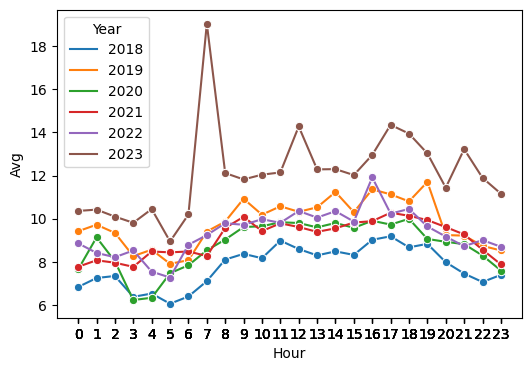

In [142]:
#The fare amount per mile increases over the years, especially in 2023 it is very high compared to other years
trips_with_years = yellow_taxi_df.groupby(['Hour','Year'])['fare_per_mile'].mean().reset_index(name='Avg').sort_values(by='Hour',ascending=True)

plt.figure(figsize=(6,4))
sns.lineplot(data=trips_with_years, x="Hour", y="Avg", ci=None, color="green", hue='Year' , marker='o', palette='tab10')
plt.xticks(trips_with_years['Hour'], trips_with_years['Hour'])
plt.show()